# 모델링

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
from numpy import unique
from urllib.request import urlopen  
from bs4 import BeautifulSoup 
import requests
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import math
from sklearn.cluster import AgglomerativeClustering
import pprint
from sklearn.metrics import silhouette_score
from numpy import where
from matplotlib import pyplot
import json
from sklearn.cluster import DBSCAN
import ssl
import matplotlib.gridspec as gridspec
ssl._create_default_https_context = ssl._create_unverified_context
from sklearn.cluster import KMeans
import warnings
from scipy.spatial import distance
warnings.filterwarnings("ignore")
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
from math import *
import glob, os
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial import distance
from sklearn.cluster import AffinityPropagation

import string
import sys  
from numpy import dot
from numpy.linalg import norm
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import OPTICS, cluster_optics_dbscan
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage, dendrogram
import warnings
warnings.filterwarnings("ignore")
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
from matplotlib import font_manager, rc
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
from scipy.stats import pearsonr
from sklearn.preprocessing import MinMaxScaler

## 1. 데이터 로드 및 전처리

### 1.1. 데이터 로드

In [2]:
tmp_df_prim = pd.read_csv('../data/행정동_기준_동별데이터_버스추가.csv') # 1차 카테고리 : 5, 2차 카테고리 : 9
tmp_df_prim.columns
tmp_df_prim['GU_DONG'] = tmp_df_prim['GU']+tmp_df_prim['DONG']
# tmp_df.set_index('DONG',inplace=True)
tmp_df_prim

Index(['Unnamed: 0', 'SUBWAY_NUM', 'STARBUCKS_NUM', 'SPORT_NUM',
       'SAFE_DLVR_NUM', 'MC_NUM', 'KINDER_NUM', 'KIDS_NUM', 'GYM_NUM',
       'GOLF_NUM', 'ACADEMY_NUM', 'ANIMAL_HSPT_NUM', 'BIKE_NUM', 'CAFE',
       'CAR_SHR_NUM', 'CCTV_NUM', 'CHILD_MED_NUM', 'CON_NUM', 'DPTM_NUM', 'GU',
       'DONG', 'DONG_CODE', 'BUS_CNT'],
      dtype='object')

,Unnamed: 0,SUBWAY_NUM,STARBUCKS_NUM,SPORT_NUM,SAFE_DLVR_NUM,MC_NUM,KINDER_NUM,KIDS_NUM,GYM_NUM,GOLF_NUM,...,CAR_SHR_NUM,CCTV_NUM,CHILD_MED_NUM,CON_NUM,DPTM_NUM,GU,DONG,DONG_CODE,BUS_CNT,GU_DONG
0,0,0.333333,0.333333,0.0,1.000000,0.0,0.000000,0.000000,0.0,0.000000,...,1.000000,56.666667,7.333333,2.000000,0.0,종로구,청운효자동,1111051500,14.0,종로구청운효자동
1,1,1.333333,7.333333,0.0,0.000000,0.0,10.000000,0.000000,18.0,3.000000,...,5.000000,41.666667,10.333333,10.000000,0.0,종로구,사직동,1111053000,16.0,종로구사직동
2,2,0.000000,1.000000,1.0,0.000000,0.0,10.000000,0.000000,3.0,0.000000,...,1.000000,22.000000,1.000000,1.000000,0.0,종로구,삼청동,1111054000,11.0,종로구삼청동
3,3,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,2.0,2.000000,...,5.000000,41.000000,5.000000,4.000000,0.0,종로구,부암동,1111055000,9.0,종로구부암동
4,4,0.000000,1.000000,0.0,0.000000,0.0,0.000000,0.000000,5.0,5.000000,...,0.000000,21.000000,10.000000,3.000000,0.0,종로구,평창동,1111056000,37.0,종로구평창동
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,421,1.333333,1.333333,0.0,0.666667,0.0,16.666667,0.666667,10.0,4.666667,...,6.666667,52.000000,4.000000,19.333333,0.0,강동구,성내2동,1174065000,11.0,강동구성내2동
422,422,1.333333,1.333333,0.0,0.666667,0.0,16.666667,0.666667,10.0,4.666667,...,6.666667,52.000000,4.000000,19.333333,0.0,강동구,성내3동,1174066000,9.0,강동구성내3동
423,423,0.000000,2.000000,0.0,1.000000,0.0,20.000000,1.000000,18.0,9.000000,...,10.000000,119.000000,10.000000,38.000000,0.0,강동구,길동,1174068500,28.0,강동구길동
424,424,0.500000,0.000000,0.0,0.000000,0.5,0.000000,0.000000,4.0,3.000000,...,2.000000,32.500000,0.000000,8.500000,0.0,강동구,둔촌1동,1174069000,4.0,강동구둔촌1동


In [3]:
density_df = pd.read_excel('../data/인구밀도.xlsx') # 1차 카테고리 : 5, 2차 카테고리 : 9
density_df['GU_DONG'] = density_df['GU']+density_df['DONG']
density_df = density_df.drop(['GU','DONG'],axis=1)

In [4]:
tmp_df = pd.merge(tmp_df_prim, density_df)
tmp_df_nodong = tmp_df.drop(['Unnamed: 0','GU_DONG','GU','DONG','POP','AREA','DENSITY','DONG_CODE'],axis=1)
tmp_df_nodong.columns
tmp_df_nodong

Index(['SUBWAY_NUM', 'STARBUCKS_NUM', 'SPORT_NUM', 'SAFE_DLVR_NUM', 'MC_NUM',
       'KINDER_NUM', 'KIDS_NUM', 'GYM_NUM', 'GOLF_NUM', 'ACADEMY_NUM',
       'ANIMAL_HSPT_NUM', 'BIKE_NUM', 'CAFE', 'CAR_SHR_NUM', 'CCTV_NUM',
       'CHILD_MED_NUM', 'CON_NUM', 'DPTM_NUM', 'BUS_CNT'],
      dtype='object')

,SUBWAY_NUM,STARBUCKS_NUM,SPORT_NUM,SAFE_DLVR_NUM,MC_NUM,KINDER_NUM,KIDS_NUM,GYM_NUM,GOLF_NUM,ACADEMY_NUM,ANIMAL_HSPT_NUM,BIKE_NUM,CAFE,CAR_SHR_NUM,CCTV_NUM,CHILD_MED_NUM,CON_NUM,DPTM_NUM,BUS_CNT
0,0.333333,0.333333,0.0,1.000000,0.0,0.000000,0.000000,0.0,0.000000,18.000000,4.000000,5.666667,39.666667,1.000000,56.666667,7.333333,2.000000,0.0,14.0
1,1.333333,7.333333,0.0,0.000000,0.0,10.000000,0.000000,18.0,3.000000,19.000000,2.000000,11.666667,100.666667,5.000000,41.666667,10.333333,10.000000,0.0,16.0
2,0.000000,1.000000,1.0,0.000000,0.0,10.000000,0.000000,3.0,0.000000,2.000000,0.000000,7.000000,52.000000,1.000000,22.000000,1.000000,1.000000,0.0,11.0
3,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,2.0,2.000000,24.000000,6.000000,5.000000,30.000000,5.000000,41.000000,5.000000,4.000000,0.0,9.0
4,0.000000,1.000000,0.0,0.000000,0.0,0.000000,0.000000,5.0,5.000000,28.000000,0.000000,7.000000,36.000000,0.000000,21.000000,10.000000,3.000000,0.0,37.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,1.333333,1.333333,0.0,0.666667,0.0,16.666667,0.666667,10.0,4.666667,63.333333,5.333333,6.000000,47.666667,6.666667,52.000000,4.000000,19.333333,0.0,11.0
422,1.333333,1.333333,0.0,0.666667,0.0,16.666667,0.666667,10.0,4.666667,63.333333,5.333333,6.000000,47.666667,6.666667,52.000000,4.000000,19.333333,0.0,9.0
423,0.000000,2.000000,0.0,1.000000,0.0,20.000000,1.000000,18.0,9.000000,100.000000,16.000000,9.000000,63.000000,10.000000,119.000000,10.000000,38.000000,0.0,28.0
424,0.500000,0.000000,0.0,0.000000,0.5,0.000000,0.000000,4.0,3.000000,38.000000,3.000000,5.500000,17.500000,2.000000,32.500000,0.000000,8.500000,0.0,4.0


## 2. 군집화 - 면적나누기 없이

### 2.0 Elbow 확인

In [5]:
tmp_df_01 = tmp_df_nodong
# data
tmp_df_01.columns

Index(['SUBWAY_NUM', 'STARBUCKS_NUM', 'SPORT_NUM', 'SAFE_DLVR_NUM', 'MC_NUM',
       'KINDER_NUM', 'KIDS_NUM', 'GYM_NUM', 'GOLF_NUM', 'ACADEMY_NUM',
       'ANIMAL_HSPT_NUM', 'BIKE_NUM', 'CAFE', 'CAR_SHR_NUM', 'CCTV_NUM',
       'CHILD_MED_NUM', 'CON_NUM', 'DPTM_NUM', 'BUS_CNT'],
      dtype='object')

In [6]:
# 차원축소
pca = PCA(2)
# Transform the data
transform = pca.fit_transform(tmp_df_01)

<Figure size 720x432 with 0 Axes>

KMeans(n_clusters=1, random_state=0)

KMeans(n_clusters=2, random_state=0)

KMeans(n_clusters=3, random_state=0)

KMeans(n_clusters=4, random_state=0)

KMeans(n_clusters=5, random_state=0)

KMeans(n_clusters=6, random_state=0)

KMeans(n_clusters=7, random_state=0)

KMeans(random_state=0)

KMeans(n_clusters=9, random_state=0)

Text(0.5, 1.0, 'The Elbow Method')

Text(0.5, 0, 'Number of clusters')

Text(0, 0.5, 'CS')

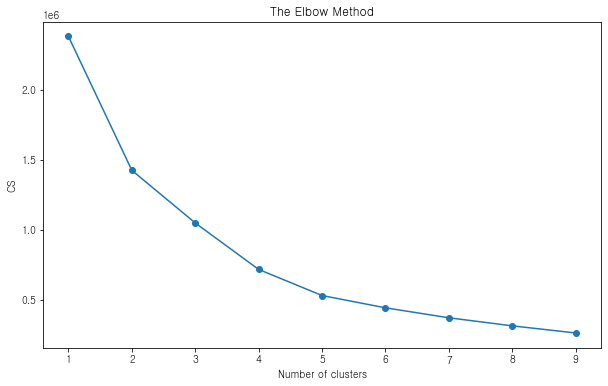

In [7]:
cs = []
plt.figure(figsize=(10,6))
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, random_state=0)
    kmeans.fit(transform)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 10), cs,marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

### 2.1 군집화 및 분류 결과 확인

In [8]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, random_state=0)

In [9]:
label = kmeans.fit(transform)
# label

#Getting unique labels
u_labels = np.unique(label)
df = tmp_df.copy()
df['km_cluster'] = kmeans.labels_
df.groupby('km_cluster').count()
df.head()

,Unnamed: 0,SUBWAY_NUM,STARBUCKS_NUM,SPORT_NUM,SAFE_DLVR_NUM,MC_NUM,KINDER_NUM,KIDS_NUM,GYM_NUM,GOLF_NUM,...,CON_NUM,DPTM_NUM,GU,DONG,DONG_CODE,BUS_CNT,GU_DONG,POP,AREA,DENSITY
km_cluster,,,,,,,,,,,,,,,,,,,,,
0,318,318,318,318,318,318,318,318,318,318,...,318,318,318,318,318,318,318,318,318,318
1,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
2,47,47,47,47,47,47,47,47,47,47,...,47,47,47,47,47,47,47,47,47,47
3,52,52,52,52,52,52,52,52,52,52,...,52,52,52,52,52,52,52,52,52,52


,Unnamed: 0,SUBWAY_NUM,STARBUCKS_NUM,SPORT_NUM,SAFE_DLVR_NUM,MC_NUM,KINDER_NUM,KIDS_NUM,GYM_NUM,GOLF_NUM,...,DPTM_NUM,GU,DONG,DONG_CODE,BUS_CNT,GU_DONG,POP,AREA,DENSITY,km_cluster
0,0,0.333333,0.333333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,종로구,청운효자동,1111051500,14.0,종로구청운효자동,12177,2.57,4738,0
1,1,1.333333,7.333333,0.0,0.0,0.0,10.0,0.0,18.0,3.0,...,0.0,종로구,사직동,1111053000,16.0,종로구사직동,9636,1.23,7834,0
2,2,0.000000,1.000000,1.0,0.0,0.0,10.0,0.0,3.0,0.0,...,0.0,종로구,삼청동,1111054000,11.0,종로구삼청동,2739,1.49,1838,0
3,3,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,2.0,2.0,...,0.0,종로구,부암동,1111055000,9.0,종로구부암동,9782,2.27,4309,0
4,4,0.000000,1.000000,0.0,0.0,0.0,0.0,0.0,5.0,5.0,...,0.0,종로구,평창동,1111056000,37.0,종로구평창동,18329,8.87,2066,0


### 2.2 1차군집화 시각화

Text(0.5, 0, 'PCA1')

Text(0, 0.5, 'PCA2')

Text(0.5, 1.0, '2 Clusters Visualization by 2 PCA Components')

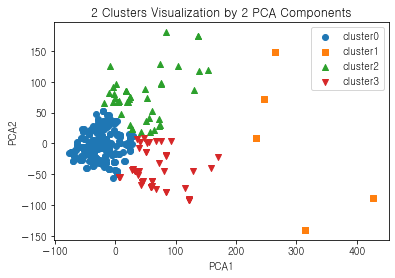

In [10]:
df['pca_x'] = transform[:, 0]  #x좌표
df['pca_y'] = transform[:, 1]  #y좌표
# 클러스터별 인덱스 추출
marker0 = df[df['km_cluster'] == 0].index
marker1 = df[df['km_cluster'] == 1].index
marker2 = df[df['km_cluster'] == 2].index
marker3 = df[df['km_cluster'] == 3].index
marker4 = df[df['km_cluster'] == 4].index

 
 #scatter plot
plt.scatter(x = df.loc[marker0, 'pca_x'], y = df.loc[marker0, 'pca_y'], marker = 'o')
plt.scatter(x = df.loc[marker1, 'pca_x'], y = df.loc[marker1, 'pca_y'], marker = 's')
plt.scatter(x = df.loc[marker2, 'pca_x'], y = df.loc[marker2, 'pca_y'], marker = '^')
plt.scatter(x = df.loc[marker3, 'pca_x'], y = df.loc[marker3, 'pca_y'], marker = 'v')
plt.scatter(x = df.loc[marker4, 'pca_x'], y = df.loc[marker4, 'pca_y'], marker = '>')
 
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('2 Clusters Visualization by 2 PCA Components')
plt.legend(['cluster0', 'cluster1','cluster2','cluster3'])
plt.show()

In [11]:
# # 클러스터 확인
# df_1 = df[df['km_cluster']==2]
# df_1 = df_1.drop(['GU','DONG','DONG_CODE','GU_DONG','POP','AREA','DENSITY'],axis=1)
# df_1[df_1['SUBWAY_NUM']!=0]

In [12]:
from yellowbrick.cluster import SilhouetteVisualizer

SilhouetteVisualizer(ax=<AxesSubplot:>, colors='yellowbrick',
                     estimator=KMeans(n_clusters=4, random_state=0))

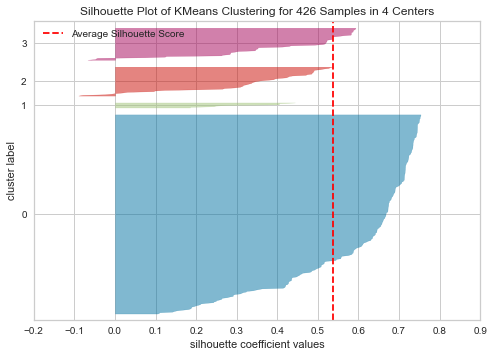

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 426 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [13]:
#visualizer 생성
visualizer_2 = SilhouetteVisualizer(kmeans, colors='yellowbrick')
#생성된 visualizer에 데이터 입력 
visualizer_2.fit(transform)      
visualizer_2.show()

### 2차 군집화 시도

In [14]:
df_0 = df[df['km_cluster']==0]
df_0_1= df_0.drop(['km_cluster','DONG','GU_DONG','POP','AREA','DENSITY','GU','DONG_CODE','pca_x','pca_y'],axis=1)
df_0_1

,Unnamed: 0,SUBWAY_NUM,STARBUCKS_NUM,SPORT_NUM,SAFE_DLVR_NUM,MC_NUM,KINDER_NUM,KIDS_NUM,GYM_NUM,GOLF_NUM,ACADEMY_NUM,ANIMAL_HSPT_NUM,BIKE_NUM,CAFE,CAR_SHR_NUM,CCTV_NUM,CHILD_MED_NUM,CON_NUM,DPTM_NUM,BUS_CNT
0,0,0.333333,0.333333,0.0,1.000000,0.0,0.000000,0.000000,0.0,0.000000,18.000000,4.000000,5.666667,39.666667,1.000000,56.666667,7.333333,2.000000,0.0,14.0
1,1,1.333333,7.333333,0.0,0.000000,0.0,10.000000,0.000000,18.0,3.000000,19.000000,2.000000,11.666667,100.666667,5.000000,41.666667,10.333333,10.000000,0.0,16.0
2,2,0.000000,1.000000,1.0,0.000000,0.0,10.000000,0.000000,3.0,0.000000,2.000000,0.000000,7.000000,52.000000,1.000000,22.000000,1.000000,1.000000,0.0,11.0
3,3,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,2.0,2.000000,24.000000,6.000000,5.000000,30.000000,5.000000,41.000000,5.000000,4.000000,0.0,9.0
4,4,0.000000,1.000000,0.0,0.000000,0.0,0.000000,0.000000,5.0,5.000000,28.000000,0.000000,7.000000,36.000000,0.000000,21.000000,10.000000,3.000000,0.0,37.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,420,1.333333,1.333333,0.0,0.666667,0.0,16.666667,0.666667,10.0,4.666667,63.333333,5.333333,6.000000,47.666667,6.666667,52.000000,4.000000,19.333333,0.0,5.0
421,421,1.333333,1.333333,0.0,0.666667,0.0,16.666667,0.666667,10.0,4.666667,63.333333,5.333333,6.000000,47.666667,6.666667,52.000000,4.000000,19.333333,0.0,11.0
422,422,1.333333,1.333333,0.0,0.666667,0.0,16.666667,0.666667,10.0,4.666667,63.333333,5.333333,6.000000,47.666667,6.666667,52.000000,4.000000,19.333333,0.0,9.0
424,424,0.500000,0.000000,0.0,0.000000,0.5,0.000000,0.000000,4.0,3.000000,38.000000,3.000000,5.500000,17.500000,2.000000,32.500000,0.000000,8.500000,0.0,4.0


In [15]:
# Transform the data
transform_01 = pca.fit_transform(df_0_1)
df_0['pca_x'] = transform_01[:, 0]  #x좌표
df_0['pca_y'] = transform_01[:, 1]  #y좌표
df_0

,Unnamed: 0,SUBWAY_NUM,STARBUCKS_NUM,SPORT_NUM,SAFE_DLVR_NUM,MC_NUM,KINDER_NUM,KIDS_NUM,GYM_NUM,GOLF_NUM,...,DONG,DONG_CODE,BUS_CNT,GU_DONG,POP,AREA,DENSITY,km_cluster,pca_x,pca_y
0,0,0.333333,0.333333,0.0,1.000000,0.0,0.000000,0.000000,0.0,0.000000,...,청운효자동,1111051500,14.0,종로구청운효자동,12177,2.57,4738,0,-198.732498,6.335864
1,1,1.333333,7.333333,0.0,0.000000,0.0,10.000000,0.000000,18.0,3.000000,...,사직동,1111053000,16.0,종로구사직동,9636,1.23,7834,0,-197.058213,5.437899
2,2,0.000000,1.000000,1.0,0.000000,0.0,10.000000,0.000000,3.0,0.000000,...,삼청동,1111054000,11.0,종로구삼청동,2739,1.49,1838,0,-196.869721,-27.692732
3,3,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,2.0,2.000000,...,부암동,1111055000,9.0,종로구부암동,9782,2.27,4309,0,-194.988580,-8.393369
4,4,0.000000,1.000000,0.0,0.000000,0.0,0.000000,0.000000,5.0,5.000000,...,평창동,1111056000,37.0,종로구평창동,18329,8.87,2066,0,-193.227649,-22.938252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,420,1.333333,1.333333,0.0,0.666667,0.0,16.666667,0.666667,10.0,4.666667,...,성내1동,1174064000,5.0,강동구성내1동,20045,0.58,34560,0,223.739435,17.264938
421,421,1.333333,1.333333,0.0,0.666667,0.0,16.666667,0.666667,10.0,4.666667,...,성내2동,1174065000,11.0,강동구성내2동,24106,0.67,35979,0,224.753615,17.600861
422,422,1.333333,1.333333,0.0,0.666667,0.0,16.666667,0.666667,10.0,4.666667,...,성내3동,1174066000,9.0,강동구성내3동,23346,0.71,32882,0,225.745204,17.485914
424,424,0.500000,0.000000,0.0,0.000000,0.5,0.000000,0.000000,4.0,3.000000,...,둔촌1동,1174069000,4.0,강동구둔촌1동,144,0.92,157,0,225.969706,-16.190218


<Figure size 720x432 with 0 Axes>

KMeans(n_clusters=1, random_state=0)

KMeans(n_clusters=2, random_state=0)

KMeans(n_clusters=3, random_state=0)

KMeans(n_clusters=4, random_state=0)

KMeans(n_clusters=5, random_state=0)

KMeans(n_clusters=6, random_state=0)

KMeans(n_clusters=7, random_state=0)

KMeans(random_state=0)

KMeans(n_clusters=9, random_state=0)

Text(0.5, 1.0, 'The Elbow Method')

Text(0.5, 0, 'Number of clusters')

Text(0, 0.5, 'CS')

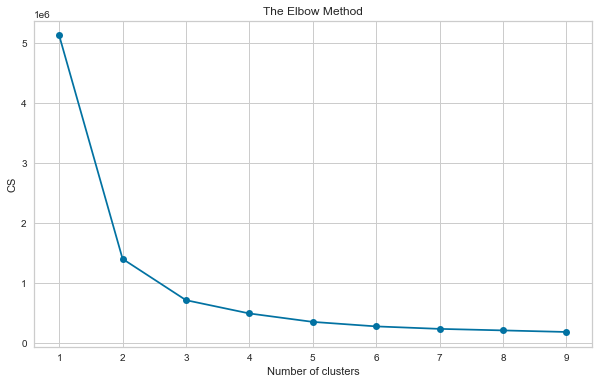

In [16]:
cs = []
plt.figure(figsize=(10,6))
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, random_state=0)
    kmeans.fit(transform_01)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 10), cs,marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [17]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)

In [18]:
# label
label_01 = kmeans.fit(transform_01)

#Getting unique labels
u_labels = np.unique(label_01)

df_0['km_cluster_01'] = kmeans.labels_
df_0

,Unnamed: 0,SUBWAY_NUM,STARBUCKS_NUM,SPORT_NUM,SAFE_DLVR_NUM,MC_NUM,KINDER_NUM,KIDS_NUM,GYM_NUM,GOLF_NUM,...,DONG_CODE,BUS_CNT,GU_DONG,POP,AREA,DENSITY,km_cluster,pca_x,pca_y,km_cluster_01
0,0,0.333333,0.333333,0.0,1.000000,0.0,0.000000,0.000000,0.0,0.000000,...,1111051500,14.0,종로구청운효자동,12177,2.57,4738,0,-198.732498,6.335864,2
1,1,1.333333,7.333333,0.0,0.000000,0.0,10.000000,0.000000,18.0,3.000000,...,1111053000,16.0,종로구사직동,9636,1.23,7834,0,-197.058213,5.437899,2
2,2,0.000000,1.000000,1.0,0.000000,0.0,10.000000,0.000000,3.0,0.000000,...,1111054000,11.0,종로구삼청동,2739,1.49,1838,0,-196.869721,-27.692732,2
3,3,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,2.0,2.000000,...,1111055000,9.0,종로구부암동,9782,2.27,4309,0,-194.988580,-8.393369,2
4,4,0.000000,1.000000,0.0,0.000000,0.0,0.000000,0.000000,5.0,5.000000,...,1111056000,37.0,종로구평창동,18329,8.87,2066,0,-193.227649,-22.938252,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,420,1.333333,1.333333,0.0,0.666667,0.0,16.666667,0.666667,10.0,4.666667,...,1174064000,5.0,강동구성내1동,20045,0.58,34560,0,223.739435,17.264938,1
421,421,1.333333,1.333333,0.0,0.666667,0.0,16.666667,0.666667,10.0,4.666667,...,1174065000,11.0,강동구성내2동,24106,0.67,35979,0,224.753615,17.600861,1
422,422,1.333333,1.333333,0.0,0.666667,0.0,16.666667,0.666667,10.0,4.666667,...,1174066000,9.0,강동구성내3동,23346,0.71,32882,0,225.745204,17.485914,1
424,424,0.500000,0.000000,0.0,0.000000,0.5,0.000000,0.000000,4.0,3.000000,...,1174069000,4.0,강동구둔촌1동,144,0.92,157,0,225.969706,-16.190218,1


(-500.0, 500.0)

Text(0.5, 0, 'PCA1')

Text(0, 0.5, 'PCA2')

Text(0.5, 1.0, '3 Clusters Visualization by 2 PCA Components')

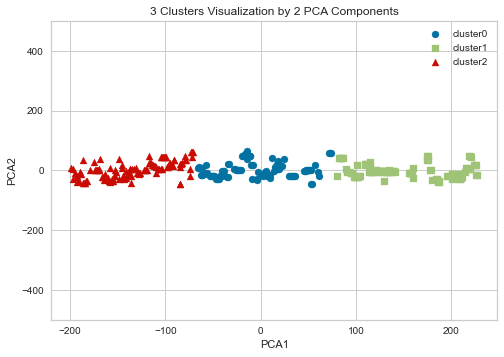

In [19]:
df_0['pca_x'] = transform_01[:, 0]  #x좌표
df_0['pca_y'] = transform_01[:, 1]  #y좌표
# 클러스터별 인덱스 추출
marker0 = df_0[df_0['km_cluster_01'] == 0].index
marker1 = df_0[df_0['km_cluster_01'] == 1].index
marker2 = df_0[df_0['km_cluster_01'] == 2].index

 
 #scatter plot
plt.scatter(x = df_0.loc[marker0, 'pca_x'], y = df_0.loc[marker0, 'pca_y'], marker = 'o')
plt.scatter(x = df_0.loc[marker1, 'pca_x'], y = df_0.loc[marker1, 'pca_y'], marker = 's')
plt.scatter(x = df_0.loc[marker2, 'pca_x'], y = df_0.loc[marker2, 'pca_y'], marker = '^')
plt.ylim([-500,500])
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.legend(['cluster0', 'cluster1','cluster2'])
plt.show()

SilhouetteVisualizer(ax=<AxesSubplot:>, colors='yellowbrick',
                     estimator=KMeans(n_clusters=3, random_state=0))

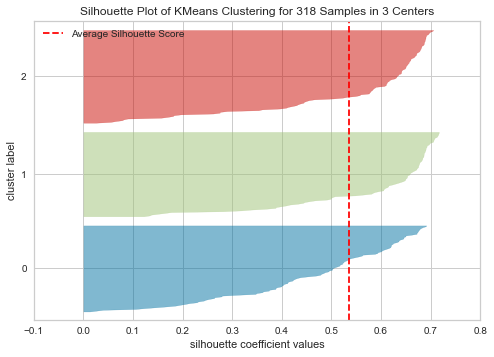

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 318 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [20]:
#visualizer 생성
visualizer_2 = SilhouetteVisualizer(kmeans, colors='yellowbrick')
#생성된 visualizer에 데이터 입력 
visualizer_2.fit(transform_01)      
visualizer_2.show()

### DBSCAN 적용

In [21]:
from sklearn.neighbors import NearestNeighbors
# n_neighbors = 5 as kneighbors function returns distance of point to itself (i.e. first column will be zeros) 
nbrs = NearestNeighbors(n_neighbors=5).fit(transform)
# Find the k-neighbors of a point
neigh_dist, neigh_ind = nbrs.kneighbors(transform)
# sort the neighbor distances (lengths to points) in ascending order
# axis = 0 represents sort along first axis i.e. sort along row
sort_neigh_dist = np.sort(neigh_dist, axis=0)

(0.0, 50.0)

Text(0, 0.5, 'k-NN distance')

Text(0.5, 0, 'Sorted observations (4th NN)')

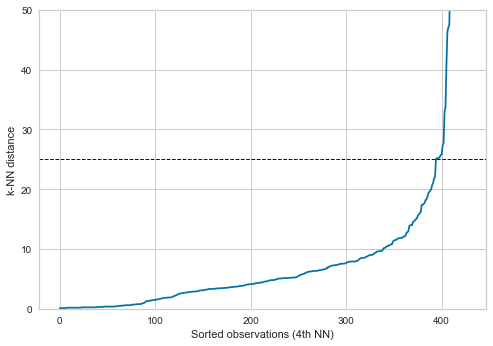

In [22]:
k_dist = sort_neigh_dist[:, 4]
plt.plot(k_dist)
plt.axhline(y=25, linewidth=1, linestyle='dashed', color='k')
# plt.xlim([0,1000])
plt.ylim([0,50])
plt.ylabel("k-NN distance")
plt.xlabel("Sorted observations (4th NN)")
plt.show()

In [23]:
clusters_db = DBSCAN(eps=11, min_samples=4).fit(transform)
# get cluster labels
clusters_db.labels_
# check unique clusters
set(clusters_db.labels_)

tmp_df_dbscan = tmp_df.copy()

array([ 0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        7, -1, -1, -1,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0,  0,  0,
        0, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1, -1,  2, -1, -1,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0, -1,  0, -1,  0,  0,  0,  2,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  3,  3,  3,  3,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
       -1,  4,  4,  4,  4

{-1, 0, 1, 2, 3, 4, 5, 6, 7, 8}

In [24]:
tmp_df_dbscan["Cluster_db"] = clusters_db.labels_
tmp_df_dbscan['pca_x'] = transform[:, 0]  
tmp_df_dbscan['pca_y'] = transform[:, 1] 
tmp_df_dbscan

,Unnamed: 0,SUBWAY_NUM,STARBUCKS_NUM,SPORT_NUM,SAFE_DLVR_NUM,MC_NUM,KINDER_NUM,KIDS_NUM,GYM_NUM,GOLF_NUM,...,DONG,DONG_CODE,BUS_CNT,GU_DONG,POP,AREA,DENSITY,Cluster_db,pca_x,pca_y
0,0,0.333333,0.333333,0.0,1.000000,0.0,0.000000,0.000000,0.0,0.000000,...,청운효자동,1111051500,14.0,종로구청운효자동,12177,2.57,4738,0,-35.956906,22.173361
1,1,1.333333,7.333333,0.0,0.000000,0.0,10.000000,0.000000,18.0,3.000000,...,사직동,1111053000,16.0,종로구사직동,9636,1.23,7834,0,-12.860230,39.026101
2,2,0.000000,1.000000,1.0,0.000000,0.0,10.000000,0.000000,3.0,0.000000,...,삼청동,1111054000,11.0,종로구삼청동,2739,1.49,1838,0,-56.043013,9.704077
3,3,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,2.0,2.000000,...,부암동,1111055000,9.0,종로구부암동,9782,2.27,4309,0,-39.712625,3.673175
4,4,0.000000,1.000000,0.0,0.000000,0.0,0.000000,0.000000,5.0,5.000000,...,평창동,1111056000,37.0,종로구평창동,18329,8.87,2066,0,-39.226285,-8.864375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,421,1.333333,1.333333,0.0,0.666667,0.0,16.666667,0.666667,10.0,4.666667,...,성내2동,1174065000,11.0,강동구성내2동,24106,0.67,35979,0,7.595119,0.421296
422,422,1.333333,1.333333,0.0,0.666667,0.0,16.666667,0.666667,10.0,4.666667,...,성내3동,1174066000,9.0,강동구성내3동,23346,0.71,32882,0,7.505057,0.343281
423,423,0.000000,2.000000,0.0,1.000000,0.0,20.000000,1.000000,18.0,9.000000,...,길동,1174068500,28.0,강동구길동,45973,2.17,21186,-1,71.683752,40.198035
424,424,0.500000,0.000000,0.0,0.000000,0.5,0.000000,0.000000,4.0,3.000000,...,둔촌1동,1174069000,4.0,강동구둔촌1동,144,0.92,157,0,-35.664814,-15.051386


Text(0.5, 1.0, 'DBSCAN Clustering')

Text(0.5, 0, 'X0')

Text(0, 0.5, 'X1')

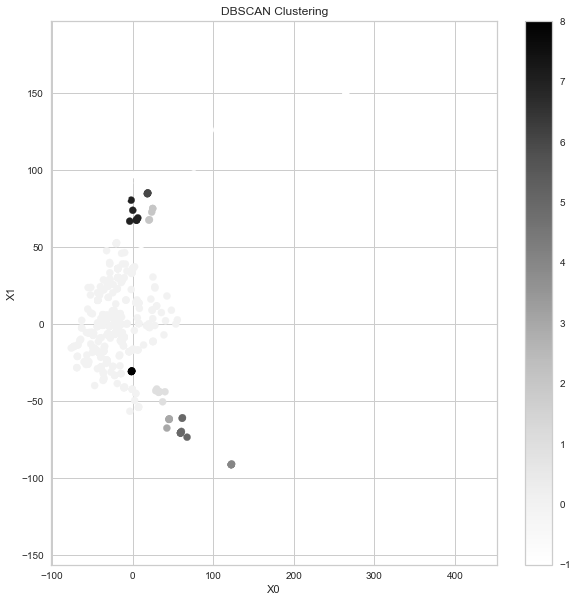

In [25]:
fig = plt.figure(figsize=(10,10)); ax = fig.add_subplot(111)
scatter = ax.scatter(tmp_df_dbscan['pca_x'],tmp_df_dbscan['pca_y'], c=tmp_df_dbscan["Cluster_db"],s=50)
ax.set_title("DBSCAN Clustering")
ax.set_xlabel("X0")
ax.set_ylabel("X1")
plt.colorbar(scatter)
plt.show()

### 1차 Kmeans 이후 DBSCAN 진행

In [26]:
df_0 = df[df['km_cluster']==0]
df_0_db= df_0.drop(['km_cluster','DONG','GU_DONG','POP','AREA','DENSITY','GU','DONG_CODE','Unnamed: 0'],axis=1)
df_0_db.columns

Index(['SUBWAY_NUM', 'STARBUCKS_NUM', 'SPORT_NUM', 'SAFE_DLVR_NUM', 'MC_NUM',
       'KINDER_NUM', 'KIDS_NUM', 'GYM_NUM', 'GOLF_NUM', 'ACADEMY_NUM',
       'ANIMAL_HSPT_NUM', 'BIKE_NUM', 'CAFE', 'CAR_SHR_NUM', 'CCTV_NUM',
       'CHILD_MED_NUM', 'CON_NUM', 'DPTM_NUM', 'BUS_CNT', 'pca_x', 'pca_y'],
      dtype='object')

In [27]:
# Transform the data
transform_01 = pca.fit_transform(df_0_db)
df_0_db['pca_x'] = transform_01[:, 0]  #x좌표
df_0_db['pca_y'] = transform_01[:, 1]  #y좌표
df_0_db

,SUBWAY_NUM,STARBUCKS_NUM,SPORT_NUM,SAFE_DLVR_NUM,MC_NUM,KINDER_NUM,KIDS_NUM,GYM_NUM,GOLF_NUM,ACADEMY_NUM,...,BIKE_NUM,CAFE,CAR_SHR_NUM,CCTV_NUM,CHILD_MED_NUM,CON_NUM,DPTM_NUM,BUS_CNT,pca_x,pca_y
0,0.333333,0.333333,0.0,1.000000,0.0,0.000000,0.000000,0.0,0.000000,18.000000,...,5.666667,39.666667,1.000000,56.666667,7.333333,2.000000,0.0,14.0,9.719870,-39.579493
1,1.333333,7.333333,0.0,0.000000,0.0,10.000000,0.000000,18.0,3.000000,19.000000,...,11.666667,100.666667,5.000000,41.666667,10.333333,10.000000,0.0,16.0,35.299478,-24.626884
2,0.000000,1.000000,1.0,0.000000,0.0,10.000000,0.000000,3.0,0.000000,2.000000,...,7.000000,52.000000,1.000000,22.000000,1.000000,1.000000,0.0,11.0,-29.312600,-38.039893
3,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,2.0,2.000000,24.000000,...,5.000000,30.000000,5.000000,41.000000,5.000000,4.000000,0.0,9.0,-11.160778,-24.020264
4,0.000000,1.000000,0.0,0.000000,0.0,0.000000,0.000000,5.0,5.000000,28.000000,...,7.000000,36.000000,0.000000,21.000000,10.000000,3.000000,0.0,37.0,-25.364883,-7.375740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,1.333333,1.333333,0.0,0.666667,0.0,16.666667,0.666667,10.0,4.666667,63.333333,...,6.000000,47.666667,6.666667,52.000000,4.000000,19.333333,0.0,5.0,34.341653,25.508515
421,1.333333,1.333333,0.0,0.666667,0.0,16.666667,0.666667,10.0,4.666667,63.333333,...,6.000000,47.666667,6.666667,52.000000,4.000000,19.333333,0.0,11.0,34.872174,25.733775
422,1.333333,1.333333,0.0,0.666667,0.0,16.666667,0.666667,10.0,4.666667,63.333333,...,6.000000,47.666667,6.666667,52.000000,4.000000,19.333333,0.0,9.0,34.695334,25.658689
424,0.500000,0.000000,0.0,0.000000,0.5,0.000000,0.000000,4.0,3.000000,38.000000,...,5.500000,17.500000,2.000000,32.500000,0.000000,8.500000,0.0,4.0,-22.554969,-2.624851


In [28]:
from sklearn.neighbors import NearestNeighbors
# n_neighbors = 5 as kneighbors function returns distance of point to itself (i.e. first column will be zeros) 
nbrs = NearestNeighbors(n_neighbors=5).fit(transform_01)
# Find the k-neighbors of a point
neigh_dist, neigh_ind = nbrs.kneighbors(transform_01)
# sort the neighbor distances (lengths to points) in ascending order
# axis = 0 represents sort along first axis i.e. sort along row
sort_neigh_dist = np.sort(neigh_dist, axis=0)

(0.0, 40.0)

Text(0, 0.5, 'k-NN distance')

Text(0.5, 0, 'Sorted observations (4th NN)')

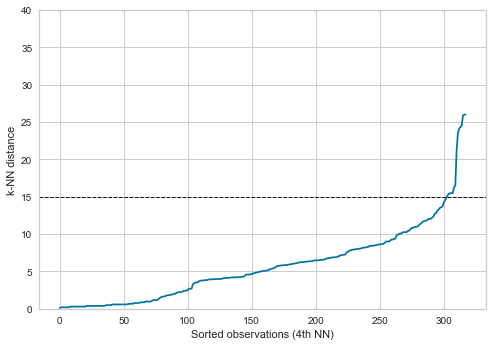

In [29]:
k_dist = sort_neigh_dist[:, 4]
plt.plot(k_dist)
plt.axhline(y=15, linewidth=1, linestyle='dashed', color='k')
plt.ylim([0,40])
plt.ylabel("k-NN distance")
plt.xlabel("Sorted observations (4th NN)")
plt.show()

In [30]:
clusters_db_2 = DBSCAN(eps=15, min_samples=10).fit(transform_01)
# get cluster labels
clusters_db_2.labels_
# check unique clusters
set(clusters_db_2.labels_)

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
       -1,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  1,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  1,  0, -1, -1, -1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  1,  0,  0,
        0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

{-1, 0, 1}

In [31]:
df_0_db["Cluster_db_2"] = clusters_db_2.labels_
df_0_db['pca_x'] = transform_01[:, 0]  
df_0_db['pca_y'] = transform_01[:, 1] 
df_0_db

,SUBWAY_NUM,STARBUCKS_NUM,SPORT_NUM,SAFE_DLVR_NUM,MC_NUM,KINDER_NUM,KIDS_NUM,GYM_NUM,GOLF_NUM,ACADEMY_NUM,...,CAFE,CAR_SHR_NUM,CCTV_NUM,CHILD_MED_NUM,CON_NUM,DPTM_NUM,BUS_CNT,pca_x,pca_y,Cluster_db_2
0,0.333333,0.333333,0.0,1.000000,0.0,0.000000,0.000000,0.0,0.000000,18.000000,...,39.666667,1.000000,56.666667,7.333333,2.000000,0.0,14.0,9.719870,-39.579493,0
1,1.333333,7.333333,0.0,0.000000,0.0,10.000000,0.000000,18.0,3.000000,19.000000,...,100.666667,5.000000,41.666667,10.333333,10.000000,0.0,16.0,35.299478,-24.626884,0
2,0.000000,1.000000,1.0,0.000000,0.0,10.000000,0.000000,3.0,0.000000,2.000000,...,52.000000,1.000000,22.000000,1.000000,1.000000,0.0,11.0,-29.312600,-38.039893,0
3,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,2.0,2.000000,24.000000,...,30.000000,5.000000,41.000000,5.000000,4.000000,0.0,9.0,-11.160778,-24.020264,0
4,0.000000,1.000000,0.0,0.000000,0.0,0.000000,0.000000,5.0,5.000000,28.000000,...,36.000000,0.000000,21.000000,10.000000,3.000000,0.0,37.0,-25.364883,-7.375740,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,1.333333,1.333333,0.0,0.666667,0.0,16.666667,0.666667,10.0,4.666667,63.333333,...,47.666667,6.666667,52.000000,4.000000,19.333333,0.0,5.0,34.341653,25.508515,0
421,1.333333,1.333333,0.0,0.666667,0.0,16.666667,0.666667,10.0,4.666667,63.333333,...,47.666667,6.666667,52.000000,4.000000,19.333333,0.0,11.0,34.872174,25.733775,0
422,1.333333,1.333333,0.0,0.666667,0.0,16.666667,0.666667,10.0,4.666667,63.333333,...,47.666667,6.666667,52.000000,4.000000,19.333333,0.0,9.0,34.695334,25.658689,0
424,0.500000,0.000000,0.0,0.000000,0.5,0.000000,0.000000,4.0,3.000000,38.000000,...,17.500000,2.000000,32.500000,0.000000,8.500000,0.0,4.0,-22.554969,-2.624851,0


Text(0.5, 1.0, 'DBSCAN Clustering')

Text(0.5, 0, 'X0')

Text(0, 0.5, 'X1')

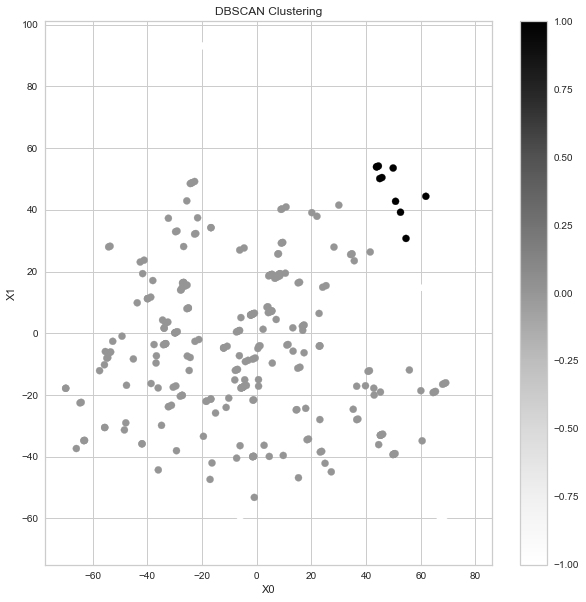

In [32]:
fig = plt.figure(figsize=(10,10)); ax = fig.add_subplot(111)
scatter = ax.scatter(df_0_db['pca_x'],df_0_db['pca_y'], c=df_0_db["Cluster_db_2"],s=50)
ax.set_title("DBSCAN Clustering")
ax.set_xlabel("X0")
ax.set_ylabel("X1")
plt.colorbar(scatter)
plt.show()

In [33]:
# #visualizer 생성
# visualizer_3 = SilhouetteVisualizer(DBSCAN(eps=20, min_samples=10), colors='yellowbrick')
# #생성된 visualizer에 데이터 입력 
# visualizer_3.fit(transform_01)      
# visualizer_3.show()

In [34]:
silhouette_score(df_0_db, clusters_db_2.labels_)

0.2680165978920591

### 계층적 군집화 - 1차

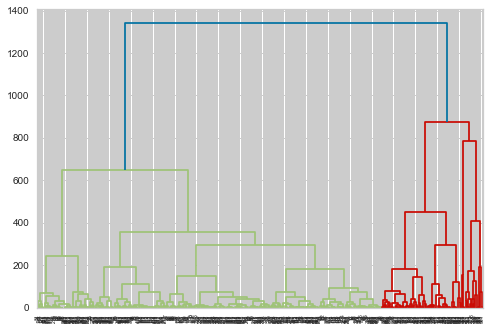

In [35]:
dendrogram = sch.dendrogram(sch.linkage(transform, method='ward'))

,Unnamed: 0,SUBWAY_NUM,STARBUCKS_NUM,SPORT_NUM,SAFE_DLVR_NUM,MC_NUM,KINDER_NUM,KIDS_NUM,GYM_NUM,GOLF_NUM,...,DONG,DONG_CODE,BUS_CNT,GU_DONG,POP,AREA,DENSITY,km_cluster,pca_x,pca_y
0,0,0.333333,0.333333,0.0,1.000000,0.0,0.000000,0.000000,0.0,0.000000,...,청운효자동,1111051500,14.0,종로구청운효자동,12177,2.57,4738,0,-35.956906,22.173361
1,1,1.333333,7.333333,0.0,0.000000,0.0,10.000000,0.000000,18.0,3.000000,...,사직동,1111053000,16.0,종로구사직동,9636,1.23,7834,0,-12.860230,39.026101
2,2,0.000000,1.000000,1.0,0.000000,0.0,10.000000,0.000000,3.0,0.000000,...,삼청동,1111054000,11.0,종로구삼청동,2739,1.49,1838,0,-56.043013,9.704077
3,3,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,2.0,2.000000,...,부암동,1111055000,9.0,종로구부암동,9782,2.27,4309,0,-39.712625,3.673175
4,4,0.000000,1.000000,0.0,0.000000,0.0,0.000000,0.000000,5.0,5.000000,...,평창동,1111056000,37.0,종로구평창동,18329,8.87,2066,0,-39.226285,-8.864375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,421,1.333333,1.333333,0.0,0.666667,0.0,16.666667,0.666667,10.0,4.666667,...,성내2동,1174065000,11.0,강동구성내2동,24106,0.67,35979,0,7.595119,0.421296
422,422,1.333333,1.333333,0.0,0.666667,0.0,16.666667,0.666667,10.0,4.666667,...,성내3동,1174066000,9.0,강동구성내3동,23346,0.71,32882,0,7.505057,0.343281
423,423,0.000000,2.000000,0.0,1.000000,0.0,20.000000,1.000000,18.0,9.000000,...,길동,1174068500,28.0,강동구길동,45973,2.17,21186,2,71.683752,40.198035
424,424,0.500000,0.000000,0.0,0.000000,0.5,0.000000,0.000000,4.0,3.000000,...,둔촌1동,1174069000,4.0,강동구둔촌1동,144,0.92,157,0,-35.664814,-15.051386


<Figure size 432x432 with 0 Axes>

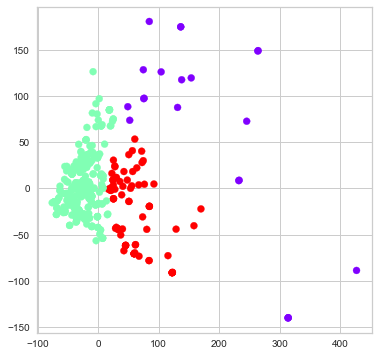

In [36]:
ac1 = AgglomerativeClustering(n_clusters = 3)
 
# Visualizing the clustering

df['pca_x'] = transform[:, 0]  #x좌표
df['pca_y'] = transform[:, 1] 
df
plt.figure(figsize =(6, 6))
plt.scatter(df['pca_x']  ,df['pca_y'] ,
           c = ac1.fit_predict(transform), cmap ='rainbow')
plt.show()

In [37]:
silhouette_score(tmp_df_01, ac1.labels_)

0.3906400512624363

### kmeans 이후 계층적 군집화

In [38]:
df_0 = df[df['km_cluster']==0]
df_0_ag= df_0.drop(['km_cluster','DONG','GU_DONG','POP','AREA','DENSITY','GU','DONG_CODE'],axis=1)
df_0_ag

,Unnamed: 0,SUBWAY_NUM,STARBUCKS_NUM,SPORT_NUM,SAFE_DLVR_NUM,MC_NUM,KINDER_NUM,KIDS_NUM,GYM_NUM,GOLF_NUM,...,BIKE_NUM,CAFE,CAR_SHR_NUM,CCTV_NUM,CHILD_MED_NUM,CON_NUM,DPTM_NUM,BUS_CNT,pca_x,pca_y
0,0,0.333333,0.333333,0.0,1.000000,0.0,0.000000,0.000000,0.0,0.000000,...,5.666667,39.666667,1.000000,56.666667,7.333333,2.000000,0.0,14.0,-35.956906,22.173361
1,1,1.333333,7.333333,0.0,0.000000,0.0,10.000000,0.000000,18.0,3.000000,...,11.666667,100.666667,5.000000,41.666667,10.333333,10.000000,0.0,16.0,-12.860230,39.026101
2,2,0.000000,1.000000,1.0,0.000000,0.0,10.000000,0.000000,3.0,0.000000,...,7.000000,52.000000,1.000000,22.000000,1.000000,1.000000,0.0,11.0,-56.043013,9.704077
3,3,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,2.0,2.000000,...,5.000000,30.000000,5.000000,41.000000,5.000000,4.000000,0.0,9.0,-39.712625,3.673175
4,4,0.000000,1.000000,0.0,0.000000,0.0,0.000000,0.000000,5.0,5.000000,...,7.000000,36.000000,0.000000,21.000000,10.000000,3.000000,0.0,37.0,-39.226285,-8.864375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,420,1.333333,1.333333,0.0,0.666667,0.0,16.666667,0.666667,10.0,4.666667,...,6.000000,47.666667,6.666667,52.000000,4.000000,19.333333,0.0,5.0,7.324932,0.187251
421,421,1.333333,1.333333,0.0,0.666667,0.0,16.666667,0.666667,10.0,4.666667,...,6.000000,47.666667,6.666667,52.000000,4.000000,19.333333,0.0,11.0,7.595119,0.421296
422,422,1.333333,1.333333,0.0,0.666667,0.0,16.666667,0.666667,10.0,4.666667,...,6.000000,47.666667,6.666667,52.000000,4.000000,19.333333,0.0,9.0,7.505057,0.343281
424,424,0.500000,0.000000,0.0,0.000000,0.5,0.000000,0.000000,4.0,3.000000,...,5.500000,17.500000,2.000000,32.500000,0.000000,8.500000,0.0,4.0,-35.664814,-15.051386


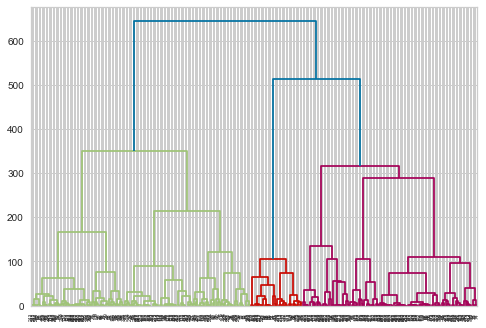

In [39]:
dendrogram = sch.dendrogram(sch.linkage(transform_01, method='ward'))

,Unnamed: 0,SUBWAY_NUM,STARBUCKS_NUM,SPORT_NUM,SAFE_DLVR_NUM,MC_NUM,KINDER_NUM,KIDS_NUM,GYM_NUM,GOLF_NUM,...,DONG,DONG_CODE,BUS_CNT,GU_DONG,POP,AREA,DENSITY,km_cluster,pca_x,pca_y
0,0,0.333333,0.333333,0.0,1.000000,0.0,0.000000,0.000000,0.0,0.000000,...,청운효자동,1111051500,14.0,종로구청운효자동,12177,2.57,4738,0,-35.956906,22.173361
1,1,1.333333,7.333333,0.0,0.000000,0.0,10.000000,0.000000,18.0,3.000000,...,사직동,1111053000,16.0,종로구사직동,9636,1.23,7834,0,-12.860230,39.026101
2,2,0.000000,1.000000,1.0,0.000000,0.0,10.000000,0.000000,3.0,0.000000,...,삼청동,1111054000,11.0,종로구삼청동,2739,1.49,1838,0,-56.043013,9.704077
3,3,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,2.0,2.000000,...,부암동,1111055000,9.0,종로구부암동,9782,2.27,4309,0,-39.712625,3.673175
4,4,0.000000,1.000000,0.0,0.000000,0.0,0.000000,0.000000,5.0,5.000000,...,평창동,1111056000,37.0,종로구평창동,18329,8.87,2066,0,-39.226285,-8.864375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,421,1.333333,1.333333,0.0,0.666667,0.0,16.666667,0.666667,10.0,4.666667,...,성내2동,1174065000,11.0,강동구성내2동,24106,0.67,35979,0,7.595119,0.421296
422,422,1.333333,1.333333,0.0,0.666667,0.0,16.666667,0.666667,10.0,4.666667,...,성내3동,1174066000,9.0,강동구성내3동,23346,0.71,32882,0,7.505057,0.343281
423,423,0.000000,2.000000,0.0,1.000000,0.0,20.000000,1.000000,18.0,9.000000,...,길동,1174068500,28.0,강동구길동,45973,2.17,21186,2,71.683752,40.198035
424,424,0.500000,0.000000,0.0,0.000000,0.5,0.000000,0.000000,4.0,3.000000,...,둔촌1동,1174069000,4.0,강동구둔촌1동,144,0.92,157,0,-35.664814,-15.051386


(-500.0, 500.0)

<Figure size 432x432 with 0 Axes>

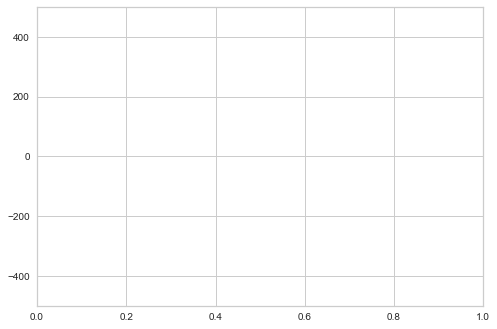

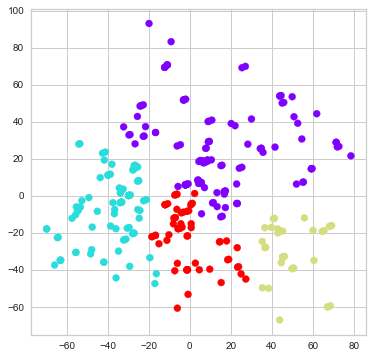

In [40]:
ac2 = AgglomerativeClustering(n_clusters = 4)
 
# Visualizing the clustering

df_0_ag['pca_x'] = transform_01[:, 0]  #x좌표
df_0_ag['pca_y'] = transform_01[:, 1] 
df
plt.ylim([-500,500])
plt.figure(figsize =(6, 6))
plt.scatter(df_0_ag['pca_x']  ,df_0_ag['pca_y'] ,
           c = ac2.fit_predict(transform_01), cmap ='rainbow')
plt.show()

In [41]:
silhouette_score(df_0_ag, ac2.labels_)

0.04188901205087645

### 2.2 사용자 분류

In [42]:
def user(user_scaled,user_name):
    user_df = pd.DataFrame(columns=col,index=[user_name])
    user_df.loc[user_name] = user_scaled
    cluster_user = kmeans.predict(user_df)
    user_df['km_cluster'] = cluster_user
    return user_df

In [43]:
user_df = user(user_scaled,'user')
user_df

NameError: name 'user_scaled' is not defined

In [ ]:
# 유저의 군집에 해당하는 지역 추출 함수
def recommand_area(df, user_df, user_name): # 지역 데이터, 유저 데이터, 유저 이름
    rc_area = user_df['km_cluster'].loc[user_name] # 해당 유저의 군집
    rc_seoul = df[df['km_cluster'] == rc_area] # 서울시 내 군집 지역 추출
    rc_list = rc_seoul.index.tolist() # 추천 리스트
    return rc_seoul, rc_list

In [ ]:
rc_seoul = recommand_area(df,user_df,'user')[0]
rc_list = recommand_area(df,user_df,'user')[1] 

In [ ]:
rc_list # 'user'가 해당하는 군집에 속한 서울 동 리스트

### 2.3 유사도 측정

In [ ]:
def similarity(user_df, df, user_name, num): # 유저 데이터, 유사도 측정을 위한 데이터, 유저 이름, 원하는 순위
    con_data = pd.concat([user_df.loc[[user_name]],df])
    rc_sim = cosine_similarity(con_data,con_data)
    sim_matrix = pd.DataFrame(rc_sim,columns=con_data.index).loc[[0]].T
    rank = sim_matrix[0].sort_values(ascending=False) # 유사도 순서로 정렬
    ranking = rank[1:num+1].index.tolist() # 1~n 위 리스트
    return ranking

In [ ]:
ranking = similarity(user_df,df,'user',4)
cluster_rank = similarity(user_df,rc_seoul,'user',4)

**겹치는 지역 제거**

In [ ]:
def concat_df(rank_1,rank_2): # 두 집단 병합 및 겹침 제거 함수
    tmp_1 = df.loc[rank_1]
    tmp_2 = df.loc[rank_2]
    x = pd.concat([tmp_1,tmp_2])
    x.reset_index(inplace=True)
    x = x.drop_duplicates(['동이름'])
    x.loc[:4]
    x.set_index('동이름',inplace=True)
    del(x['km_cluster'])
    return x

In [ ]:
con_df = concat_df(ranking,cluster_rank)
con_df

In [ ]:
def weighting(df, weight): # 가중치 부여 된 데이터 프레임 생성 함수
    data = df.values
    w = [0] * 14
    for i in range(len(weight)):
        if(user_df.loc['user'][i] != 0):
            for k in range(len(weight)):
                w[i] += weight[i][k]
    modified = []
    for k in range(len(data)):
        modi = []
        for i in range(len(w)):
            mod = data[k][i] * (1 + w[i])
            modi.append(mod)
        modified.append(modi)
    weighted_df = pd.DataFrame(modified,index=df.index,columns=col)
    return weighted_df

In [ ]:
weighted_df = weighting(con_df,weight)
weighted_df

In [ ]:
def ranking(weighted_df): # 가중치 데이터 프레임으로 3위까지
    sums = []
    for i in range(len(weighted_df.index)):
        sums.append(weighted_df.iloc[i].sum())
    weighted_df['sum'] = sums
    oh = weighted_df.T.loc['sum'].sort_values(ascending=False)
    x = pd.DataFrame(oh).index.tolist()[0:3]
    return x

In [ ]:
x = ranking(weighted_df)
x